# Diabetes Classification using Rotation Forests  
Authors: Daniel Fischer, Alhagie Boye, Vamsi Sudersanam

## Introduction

In [6]:
import numpy as np  
from sklearn.model_selection import train_test_split
from sktime.classification.sklearn import RotationForest 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data using np.loadtxt to reduce the amount of float values
data = np.loadtxt('pima_indian_diabetes.csv', delimiter=',', skiprows=1)

# Split the data into training, validation and testing sets 
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn 
train, validate, test = np.split(data, [int(0.6 * len(data)), int(0.8 * len(data))])

# Separating the features and the target for each split
X_train, y_train = train[:, :-1], train[:, -1]
X_validate, y_validate = validate[:, :-1], validate[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

## Creating the model

In [4]:

# Rotation Forest Classifier
rotation_forest = RotationForest(random_state=42)
rotation_forest.fit(X_train, y_train)

# Validations 
y_validate_pred = rotation_forest.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_validate_pred)

# Model Testing
y_test_pred = rotation_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# RESULTS!!!
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 0.86
Test Accuracy: 0.76


Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.79      0.86      0.82        99
    Diabetic       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



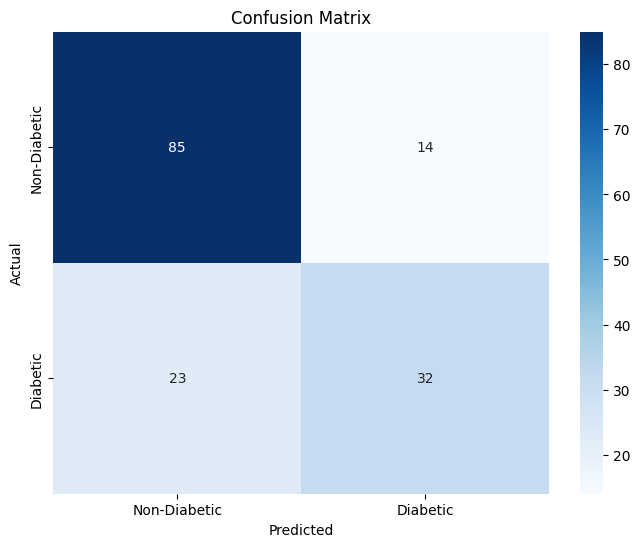

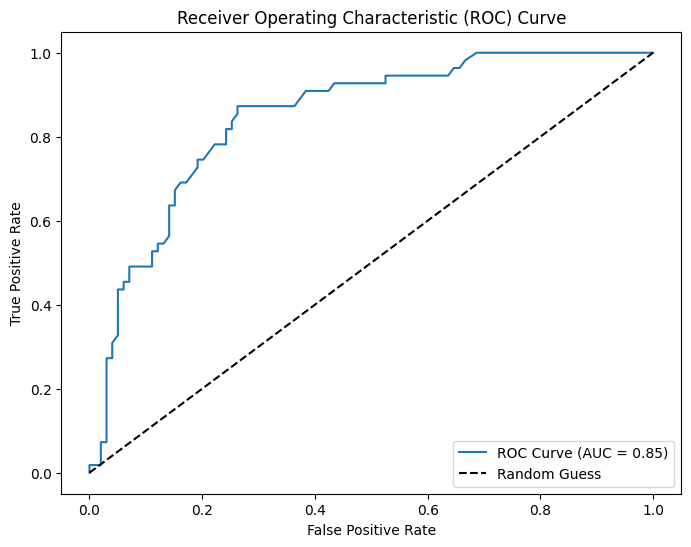

In [7]:
# The classification report
report = classification_report(y_test, y_test_pred, target_names=['Non-Diabetic', 'Diabetic'])
print("Classification Report:\n")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score
y_test_prob = rotation_forest.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
